<img src="mahalanobiseuclidean.png" width="350" height="300" align="right"/>

# Mahalanobis Distance 
  
Author: Christoph Güttner  
  
The Euclidian Distance is compared to the Mahalanobis Distance.  
Therefore three datasets (Sphere, Random Noise, Ellipse) with different  
covariance matrices provide the background for 30 testpoints. The  
testpoints are located around the unit circle and measured by both  
of the two distance measurements.

Euclidean distance is specified by the following equation: 

$Euclid = \sqrt{\sum_{i=1}^{d}(a_i - b_i)^2}$  
​	 
The Mahalanobis Distance by the following:  
  
$Mahal = \sqrt{(x- \mu)^{T}⋅\Sigma^{-1}⋅(x- \mu)}$  
  

where $\Sigma^{-1}$ is the inverse covariance matrix of the data,
  
$\mu$ the mean of the data, 
  
x are the testpoints that specify the distance to the mean.

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)

* [Data](#Data)
    * [Circle](#Circle)
    * [Noise](#Noise)
    * [Ellipse](#Ellipse)

In [344]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [380]:
def get_testpoints(n_testpoints, n_samples):
    circle,mean = get_Circle(n_samples)
    index = list(range(circle.shape[1]))
    TP_X, TP_Y  = [],[]
    for i in range(n_testpoints):
        choiced = np.random.choice(index,1)
        points= circle.T[choiced]
        TP_X.append(points[0][0])
        TP_Y.append(points[0][1])
        test_points=[]
        for test in zip(TP_X,TP_Y):
            test_points.append(test)
    return test_points

def get_Circle(n_samples):
    angle = np.exp(1j * 2 * np.pi / n_samples)
    angles = np.cumprod(np.ones(n_samples + 1) * angle)
    x, y = np.real(angles), np.imag(angles)
    circle = np.array([x,y])
    mean =np.mean(circle, axis = 1)
    return circle, mean

def get_Noise(n_samples):
    x=np.random.normal(0,0.5,n_samples)
    y=np.random.normal(0,0.5,n_samples)
    noise= np.array([x,y])
    mean =np.mean(noise, axis = 1)
    return noise, mean

def get_Ellipse(n_samples, dependency):
    x=np.random.normal(0,0.5,n_samples)
    y=np.random.normal(0,0.5,n_samples)
    noise= np.array([x,y])
    ellipse_transposed = np.dot(noise.T, dependency)
    ellipse = ellipse_transposed.T
    mean =np.mean(ellipse, axis = 1)
    return ellipse, mean

def get_Euclidean(a,b):
    Euclid = sum((a-b)**2)**(1/2)
    return Euclid

def get_inverse_covariance(data):
    covM = np.cov(data, bias = False) # To get the covariance matrix
    invCoveM = np.linalg.inv(covM) # To get the inverse covariance matrix
    return invCoveM

def get_Mahalanobis(mean, invCoveM, point):
    xMm = point - mean
    tem1 = np.dot(xMm,invCoveM)
    tem2 = np.dot(tem1, np.transpose(xMm))
    MD = np.sqrt(tem2)
    return MD

def plot_data(data, test_points, mean, title):
    plt.figure(figsize=(9,9))
    plt.scatter(data[0], data[1], label='data')
    plt.plot(mean[0],mean[1], '*', color='r')
    label_added =False
    for i, point in enumerate(test_points):
        plt.plot([mean[0], point[0]], [mean[1], point[1]], color='r')
        if not label_added:
            plt.scatter(test_points[i][0], test_points[i][1],color='r', label='test_points')
            label_added = True
        else:
            plt.scatter(test_points[i][0], test_points[i][1],color='r')
    plt.title(title, fontdict = {'fontsize' : 30})
    plt.legend()
    plt.xlim(-2,2)    
    plt.ylim(-2,2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()

def get_Euclidean_test(data, mean, test_points):
    Euclidean = []
    for i in range(len(test_points)):
        #distance = get_Euclidean(mean, (TP_X[i], TP_Y[i]))
        distance = get_Euclidean(mean, test_points[i])
        Euclidean.append(distance)
    return Euclidean

def get_Mahalanobis_test(data, mean, test_points):
    Mahalanobis= []
    invCov = get_inverse_covariance(data)
    for i in range(len(test_points)):
        distance = get_Mahalanobis(mean, invCov, test_points[i])
        Mahalanobis.append(distance)
    return Mahalanobis

def plot_bar(Euclidean,Mahalanobis):
    dict ={'Euclidean':Euclidean,'Mahalanobis':Mahalanobis}
    df = pd.DataFrame(dict)
    df.plot.bar(figsize=(15,5))


## Test Points

In [391]:
np.random.seed(42)
n_testpoints = 30
n_samples = 100


test_points  = get_testpoints(n_testpoints, n_samples)

## Uniform spherical distribution
The variance terms in a uniform spherical distributionare equal to $1/n$ (here $n=2$) and the covariance terms are equal to 0, so the covariance matrix is $1/n * I$. This is a great example of uncorrelated dependent variables.

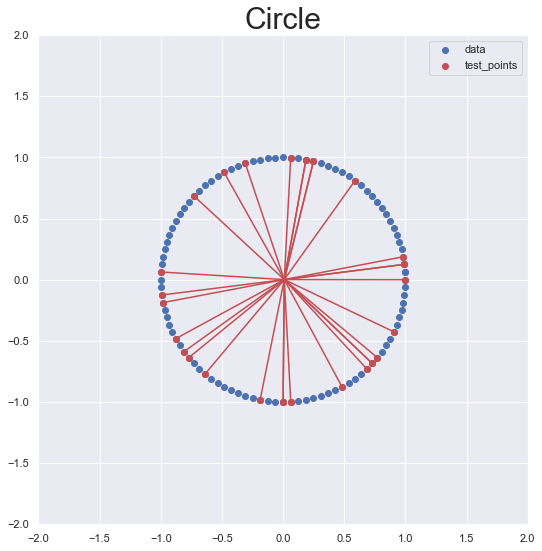

In [392]:
circle, mean = get_Circle(n_samples)
title = 'Circle'
plot_data(circle, test_points, mean, title)


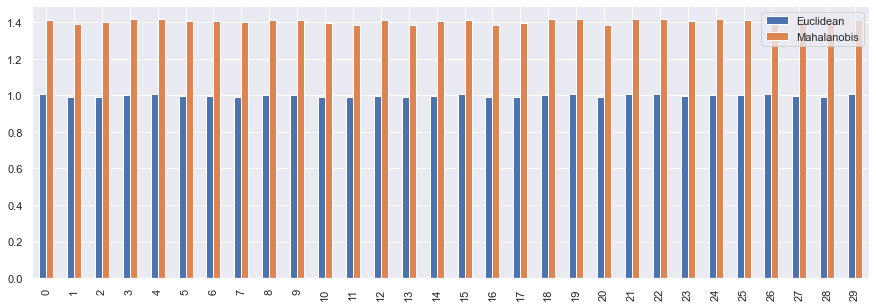

In [393]:
Euclidean = get_Euclidean_test(circle, mean, test_points )
Mahalanobis = get_Mahalanobis_test(circle, mean, test_points)
plot_bar(Euclidean,Mahalanobis)


## Noise

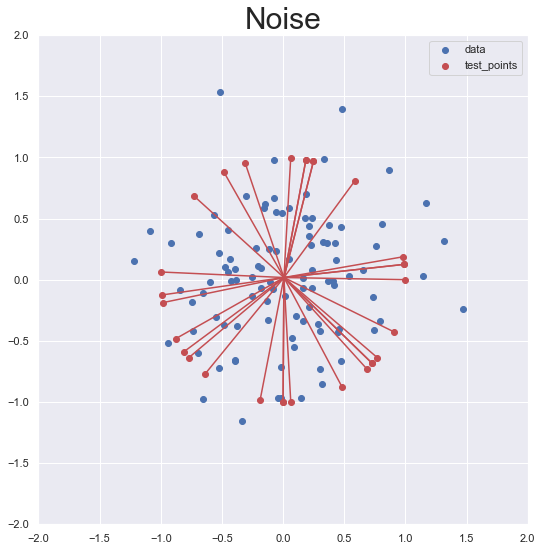

In [394]:
noise, mean = get_Noise(n_samples)

title = 'Noise'
plot_data(noise,test_points, mean, title)

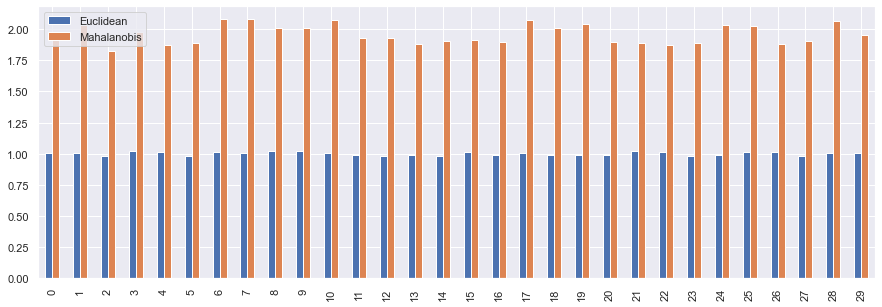

In [395]:

Euclidean = get_Euclidean_test(noise, mean, test_points )
Mahalanobis = get_Mahalanobis_test(noise, mean, test_points)
plot_bar(Euclidean,Mahalanobis)

## Correlated Dataset: Ellipse

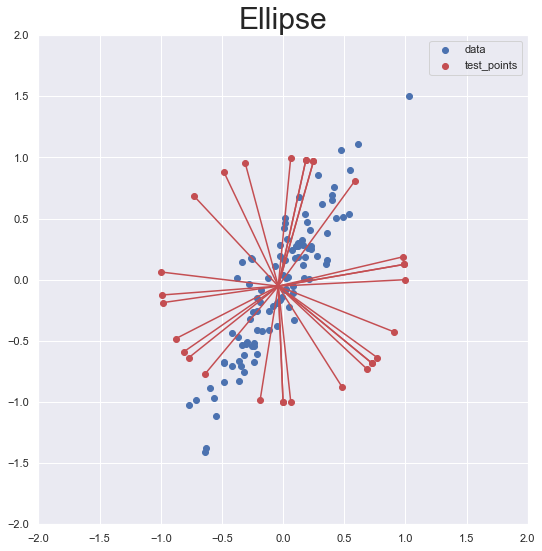

In [396]:
dependency = [[0.2, 0.8], [0.6, 0.8]] 
ellipse, mean = get_Ellipse(n_samples, dependency)
title = 'Ellipse'
plot_data(ellipse,test_points, mean, title)

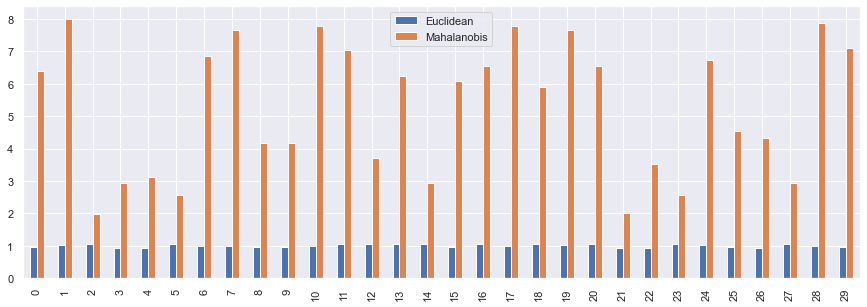

In [397]:
Euclidean = get_Euclidean_test(ellipse, mean, test_points )
Mahalanobis = get_Mahalanobis_test(ellipse, mean, test_points)
plot_bar(Euclidean,Mahalanobis)